In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.special import ellipe
from scipy.special import ellipk

#parameters for Galaxy NGC 5907
G = 4.300e-6                                        #gravitational constant (kpc/solar mass*(km/s)^2)
h = 10.57                                           #radial scale-length (kpc) [FOR NGC 5533]
d = 0.99                                            #cut-off length upper limits(kpc)
mu0 = 1.85e9                                        #central surface density [FOR NGC 5533]
z0 = 0.2*h                                          #half-thickness (kpc)
R = 4*h                                             #cut-off radius (kpc)

#rho = 10                                            #madeup parameter until we figure out the partial derivative of rho(u,xi)


#definitions
def x(r,u,xi):
    return ((r**2)+(u**2)+(xi**2))/(2*r*u)
#x = lambda r,u,xi: ((r**2)+(u**2)+(xi**2))/(2*r*u)

def px(r,u,xi):
    return x(r,u,xi)-(np.sqrt((x(r,u,xi)**2)-1))
#p = lambda x: x-(np.sqrt((x**2)-1))

rho00 = mu0/(2*z0)

print(px(1,1,0))
print(R)

1.0
42.28


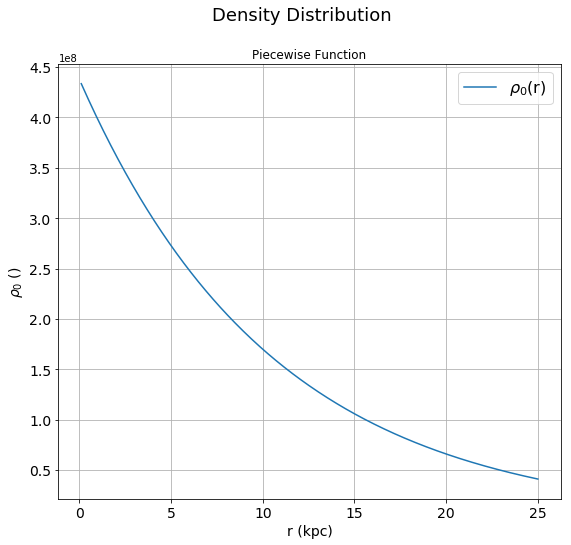

64181995.658791184
64169852.6268231


In [5]:
#density piecewise function
def rho0(r, R, h, d):
    condlist = [r <= R, (r > R) & (r <= (R+d)), r > (R+d)]
    funclist = [lambda r: rho00*np.exp(-r/h), lambda r: rho00*np.exp(-R/h)*(1-((r-R)/d)), lambda r: 0]
    return np.piecewise(r, condlist, funclist)

ra = np.linspace(0.1, 25, 500)
#ra = np.linspace(0, 25, 500)

#plotting piecewise function
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(ra, rho0(ra, R, h, d), linestyle='solid', label='$\\rho_0$(r)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('$\\rho_0$ ()', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.show()

print(rho0(20.289, R, h, d))
print(rho0(20.291, R, h, d))

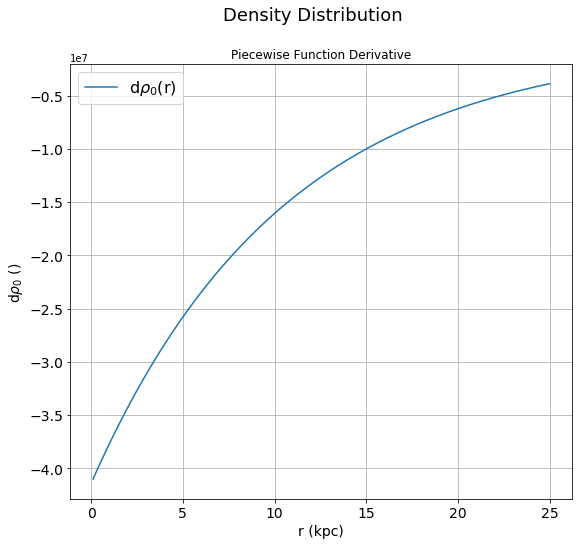

-6072090.412373811
-6070941.591941637


In [6]:
#partial derivative of rho(u,xi)
def durho0(r, R, h, d):
    condlist = [r <= R, (r > R) & (r <= (R+d)), r > (R+d)]
    funclist = [lambda r: -(1/h)*rho00*np.exp(-r/h), lambda r: -(1/d)*rho00*np.exp(-R/h), lambda r: 0]
    return np.piecewise(r, condlist, funclist)

#plotting piecewise function derivative
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(ra, durho0(ra, R, h, d), linestyle='solid', label='d$\\rho_0$(r)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function Derivative')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('d$\\rho_0$ ()', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.show()

print(durho0(20.289, R, h, d))
print(durho0(20.291, R, h, d))

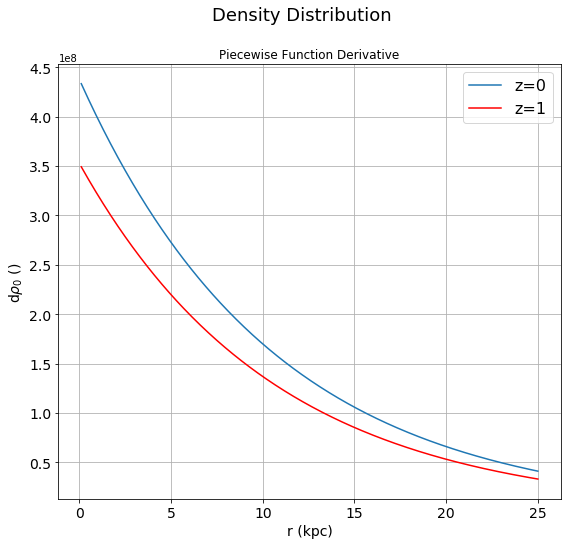

64181995.658791184
64169852.6268231
-6072090.412373811
-6070941.591941637


In [7]:
#disk density distribution
rho_rz = lambda r,z: rho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))
drho_rz = lambda r,z: durho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))

#z = np.linspace(0, 25, 500)
#print(np.shape(r3))
#print(np.shape(z3))
#print(np.shape(rho_rz(r3,z3)))

#plotting disk density distribution
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(ra, rho_rz(ra,0), linestyle='solid', label='z=0')          
plt.plot(ra, rho_rz(ra,1), linestyle='solid', label='z=1', color='r')

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Density Distribution', fontsize=18)
ax.set(title='Piecewise Function Derivative')              #labeling axes
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('d$\\rho_0$ ()', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.show()

print(rho_rz(20.289,0))
print(rho_rz(20.291,0))
print(drho_rz(20.289,0))
print(drho_rz(20.291,0))

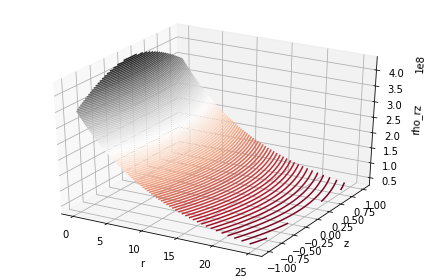

In [10]:
#plotting disk density distribution in 3D
from mpl_toolkits import mplot3d

def rho_rz2(r, z):
    return rho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))

za = np.linspace(-1, 1, 500)

RA, ZA = np.meshgrid(ra, za)
RZ = rho_rz2(RA, ZA)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(RA, ZA, RZ, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlabel('r')
ax.set_ylabel('z')
ax.set_zlabel('rho_rz');

#print(rho_rz2(2,2))

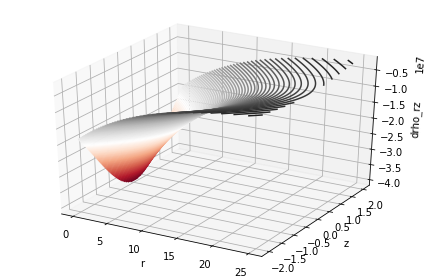

In [11]:
#plotting derivative of disk density distribution in 3D
def drho_rz2(r, z):
    return durho0(r, R, h, d)*(np.power(np.cosh(z/z0), (-2)))

zb = np.linspace(-2, 2, 500)

RB, ZB = np.meshgrid(ra, zb)
RZB = drho_rz2(RB, ZB)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(RB, ZB, RZB, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlabel('r')
ax.set_ylabel('z')
ax.set_zlabel('drho_rz');

In [12]:
#complete elliptic integral
K = lambda r,u,xi: ellipk(px(r,u,xi)) - ellipe(px(r,u,xi))

print(K(1,1,1))

0.35734399698214614


-11170452.594193138


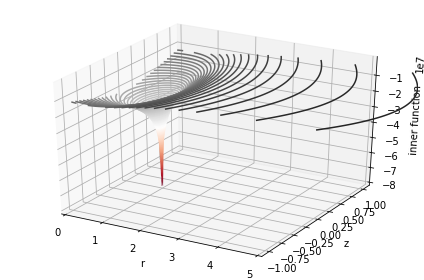

In [13]:
#inner function
f = lambda r,u,z: drho_rz(u, z)*(2*K(r,u,z))/(np.pi*np.sqrt(r*u*px(r,u,z)))

#za = np.linspace(-1, 1, 500)

#plot inner function 3D
def f2(r, u, z):
    return drho_rz(r, z)*(2*K(r,u,z))/(np.pi*np.sqrt(r*u*px(r,u,z)))

RC, ZC = np.meshgrid(ra, za)
RZC = f2(RC, 1, ZC)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(RC, ZC, RZC, 100, cmap='RdGy')

plt.tight_layout()
ax.set_xlim(0,5)
ax.set_xlabel('r')
ax.set_ylabel('z')
ax.set_zlabel('inner function');

print(f(1,1,1))

In [14]:
#integrate function
#intf = lambda xi: quad(f, 0, np.inf, args=(r,u,))
f3 = lambda z,r,u: f(r,u,z)
intf = lambda r,u: quad(f3, 0, 100, args=(r,u,))[0]
print(intf(25,5))

-1180183.683220304


In [10]:
#integrate outer function
intf3 = lambda u,r: intf(r,u)
intintf = lambda r: quad(intf3, 0, 100, args=(r,))[0]
print(intintf(1))

-33058398.036837116


C:\Users\Cirdan\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


In [11]:
#radial force function
F = lambda r: 4*np.pi*G*intintf(r)
print(F(20))

-44.072374974236325


C:\Users\Cirdan\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


C:\Users\Cirdan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Cirdan\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


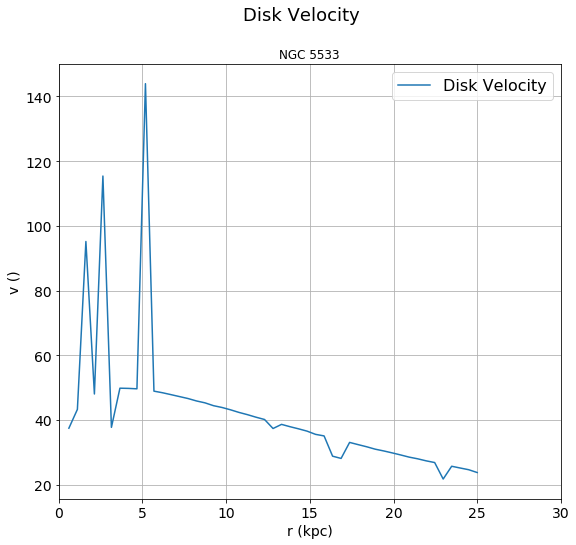

In [12]:
#plot radial force
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

rd = np.linspace(0.1, 25, num=50)
Fv = np.vectorize(F)

plt.plot(rd, np.sqrt(-rd*Fv(rd)), linestyle='solid', label='Disk Velocity')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])

fig.suptitle('Disk Velocity', fontsize=18)
ax.set(title='NGC 5533')              #labeling axes
ax.set_xlim(0,30)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v ()', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
plt.savefig('DiskVelocity5533 50pts.png')
plt.show()